<a href="https://colab.research.google.com/github/Osman-Dawood/Assinment-2/blob/main/LabAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal component analysis (PCA)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
# -------------------- Task 1: Load a dataset with more than 2 dimensions --------------------
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Target labels

print("Dataset Loaded: ", X.shape)

Dataset Loaded:  (150, 4)


Task 2: Find the first 2 principal components


In [ ]:
# Using sklearn's PCA

from sklearn.decomposition import PCA

# Step 1: Initialize PCA with the number of components
pca = PCA(n_components=2)

# Step 2: Fit PCA to the dataset
X_pca_sklearn = pca.fit_transform(X)

print("First 2 Principal Components (Sklearn):")
print(pca.components_)


First 2 Principal Components (Sklearn):
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [ ]:
# Manual PCA (without sklearn)

# Example dataset: 5 observations, 2 features

# Step 1: Standardize the data
X_centered = X - np.mean(X, axis=0)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_centered.T)

# Step 3: Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select the first 2 principal components
first_2_components = eigenvectors[:, :2]

# Step 6: Project the data onto the new components
X_pca = np.dot(X_centered, first_2_components)

print("First 2 Principal Components (Eigenvectors):")
print(first_2_components)

First 2 Principal Components (Eigenvectors):
[[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]


In [ ]:
# -------------------- Task 3: PCA to preserve a certain percentage of variance --------------------
# Retain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X)
print("Number of components for 95% variance:", pca_95.n_components_)

Number of components for 95% variance: 2


In [ ]:
# -------------------- Task 4: Train neural networks --------------------

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.3, random_state=42)

# Neural network on the original dataset
model_original = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(3, activation='softmax')
])
model_original.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_original.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Neural network on principal components
model_pca = Sequential([
    Dense(64, activation='relu', input_shape=(X_pca_train.shape[1],)),
    Dense(3, activation='softmax')
])
model_pca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_pca.fit(X_pca_train, y_train, epochs=10, validation_data=(X_pca_test, y_test))



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3378 - loss: 1.5092 - val_accuracy: 0.2889 - val_loss: 1.4278
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3524 - loss: 1.3573 - val_accuracy: 0.2889 - val_loss: 1.3688
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3014 - loss: 1.2959 - val_accuracy: 0.1556 - val_loss: 1.3249
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1245 - loss: 1.2094 - val_accuracy: 0.1111 - val_loss: 1.2863
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1557 - loss: 1.1960 - val_accuracy: 0.1556 - val_loss: 1.2399
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2643 - loss: 1.1310 - val_accuracy: 0.2222 - val_loss: 1.1964
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2771 - loss: 1.1154 - val_accuracy: 0.2000 - val_loss: 1.1496
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2806 - loss: 1.0577 - val_accuracy: 0.2444 - val_loss: 1.1056
Epoch 9/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.2875 - loss: 1.1233 - val_accuracy: 0.3111 - val_loss: 1.0952
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3288 - loss: 1.0742 - val_accuracy: 0.3111 - val_loss: 1.0302
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4031 - loss: 0.9976 - val_accuracy: 0.3111 - val_loss: 0.9700
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3593 - loss: 0.9652 - val_accuracy: 0.3333 - val_loss: 0.9144
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3877 - loss: 0.9114 - val_accuracy: 0.6222 - val_loss: 0.8641
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5965 - loss: 0.8773 - val_accuracy: 0.7778 - val_loss: 0.8176
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7058 - loss: 0.8268 - val_accuracy: 0.7778 - val_loss: 0.7743
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7395 - loss: 0.8130 - val_accuracy: 0.7778 - val_loss: 0.7352
Epoch 9/10


In [ ]:
# -------------------- Task 5: Kernel PCA (linear, sigmoid, RBF) --------------------

kernels = ['linear', 'sigmoid', 'rbf']
for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel)
    X_kpca = kpca.fit_transform(X)

    # Train a neural network on kernel PCA data
    X_kpca_train, X_kpca_test = train_test_split(X_kpca, test_size=0.3, random_state=42)
    model_kpca = Sequential([
        Dense(64, activation='relu', input_shape=(X_kpca_train.shape[1],)),
        Dense(3, activation='softmax')
    ])
    model_kpca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_kpca.fit(X_kpca_train, y_train, epochs=10, validation_data=(X_kpca_test, y_test))
    print(f"Kernel PCA with {kernel} kernel completed.")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.4710 - loss: 1.0144 - val_accuracy: 0.5556 - val_loss: 1.0045
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6545 - loss: 0.9751 - val_accuracy: 0.7111 - val_loss: 0.9405
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7180 - loss: 0.9190 - val_accuracy: 0.7556 - val_loss: 0.8822
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7766 - loss: 0.8529 - val_accuracy: 0.7778 - val_loss: 0.8291
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7669 - loss: 0.8221 - val_accuracy: 0.7778 - val_loss: 0.7813
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7697 - loss: 0.7839 - val_accuracy: 0.7778 - val_loss: 0.7381
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.7406 - val_accuracy: 0.7778 - val_loss: 0.6997
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7891 - loss: 0.7148 - val_accuracy: 0.7778 - val_loss: 0.6649
Epoch 9/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.4319 - loss: 1.0986 - val_accuracy: 0.2889 - val_loss: 1.0998
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3555 - loss: 1.0979 - val_accuracy: 0.2889 - val_loss: 1.1011
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3618 - loss: 1.0974 - val_accuracy: 0.2889 - val_loss: 1.1022
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3764 - loss: 1.0967 - val_accuracy: 0.2889 - val_loss: 1.1032
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3503 - loss: 1.0967 - val_accuracy: 0.2889 - val_loss: 1.1036
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2587 - loss: 1.0962 - val_accuracy: 0.2889 - val_loss: 1.1035
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3566 - loss: 1.0968 - val_accuracy: 0.2889 - val_loss: 1.1036
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3611 - loss: 1.0960 - val_accuracy: 0.2889 - val_loss: 1.1037
Epoch 9/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.4183 - loss: 1.1068 - val_accuracy: 0.4222 - val_loss: 1.1005
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5348 - loss: 1.0859 - val_accuracy: 0.4667 - val_loss: 1.0729
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6094 - loss: 1.0586 - val_accuracy: 0.4667 - val_loss: 1.0461
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6320 - loss: 1.0318 - val_accuracy: 0.7111 - val_loss: 1.0196
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7991 - loss: 1.0100 - val_accuracy: 0.9111 - val_loss: 0.9940
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8973 - loss: 0.9858 - val_accuracy: 0.9111 - val_loss: 0.9689
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9067 - loss: 0.9622 - val_accuracy: 0.9333 - val_loss: 0.9445
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8873 - loss: 0.9403 - val_accuracy: 0.9333 - val_loss: 0.9203
Epoch 9/10


In [ ]:
!pip install tensorflow scikeras

In [ ]:
!pip install scikeras # Install the scikeras package

# -------------------- Task 6: Pipeline and hyperparameter tuning --------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
from scikeras.wrappers import KerasClassifier # Import KerasClassifier after installing scikeras

# Assuming X and y are defined

# Define pipeline
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(2,)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

pipeline = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('classifier', KerasClassifier(model=create_model, epochs=10, verbose=0)) # Wrap Keras model
])

# Define hyperparameters to tune
param_grid = {
    'kpca__kernel': ['linear', 'sigmoid', 'rbf'],
    'kpca__gamma': [0.01, 0.1, 1],  # Example hyperparameter for RBF kernel
    'classifier__optimizer': ['adam', 'sgd'] # Access Keras model parameters like this
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy') # Add scoring parameter
grid_search.fit(X, y) # Now this should work!
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best parameters: {'classifier__optimizer': 'sgd', 'kpca__gamma': 1, 'kpca__kernel': 'rbf'}


# Classification problem

# 1- Load IRIS and MNIST fashion datasets from Keras.


In [ ]:
from sklearn.datasets import load_iris
from tensorflow.keras.datasets import fashion_mnist

# Load IRIS dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Load MNIST Fashion dataset
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()

# Normalize MNIST Fashion dataset
X_train_fashion = X_train_fashion / 255.0
X_test_fashion = X_test_fashion / 255.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#2- Build and train a neural network for classifying the loaded labeled datasets.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Neural Network for IRIS dataset
model_iris = Sequential([
    Dense(64, activation='relu', input_shape=(X_iris.shape[1],)),
    Dense(3, activation='softmax')  # 3 classes in IRIS dataset
])
model_iris.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_iris.fit(X_iris, y_iris, epochs=10)

# CNN for MNIST Fashion dataset
model_fashion = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes in MNIST Fashion dataset
])
model_fashion.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_fashion.fit(X_train_fashion[..., None], y_train_fashion, epochs=10, validation_data=(X_test_fashion[..., None], y_test_fashion))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3038 - loss: 2.5724
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3242 - loss: 1.9715 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3381 - loss: 1.5602 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3089 - loss: 1.3603 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2449 - loss: 1.2287 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1619 - loss: 1.1472 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3424 - loss: 1.1092 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3207 - loss: 1.0701 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2426 - loss: 1.0073 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2823 - loss: 0.9482 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.8168 - loss: 0.5160 - val_accuracy: 0.8828 - val_loss: 0.3246
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 29ms/step - accuracy: 0.9030 - loss: 0.2688 - val_accuracy: 0.9043 - val_loss: 0.2648
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9182 - loss: 0.2214 - val_accuracy: 0.9066 - val_loss: 0.2546
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9318 - loss: 0.1846 - val_accuracy: 0.9085 - val_loss: 0.2482
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 27ms/step - accuracy: 0.9416 - loss: 0.1578 - val_accuracy: 0.9146 - val_loss: 0.2575
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9502 - loss: 0.1365 - val_accuracy: 0.9197 - val_loss: 0.2456
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9580 - loss: 0.1179 - val_accuracy: 0.9183 - val_loss: 0.2565
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9642 -

#3- Tune the hyperparameters (including hidden layer size and activation functions). What else can be tuned?


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9790 - loss: 0.0581 - val_accuracy: 0.9098 - val_loss: 0.3375
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.9815 - loss: 0.0511 - val_accuracy: 0.9156 - val_loss: 0.3430
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.9837 - loss: 0.0455 - val_accuracy: 0.9172 - val_loss: 0.3617
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9856 - loss: 0.0378 - val_accuracy: 0.9137 - val_loss: 0.3860
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9887 - loss: 0.0325 - val_accuracy: 0.9135 - val_loss: 0.4223
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.9887 - loss: 0.0309 - val_accuracy: 0.9131 - val_loss: 0.4272
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9910 - loss: 0.0265 - val_accuracy: 0.9181 - val_loss: 0.4199
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9913 -

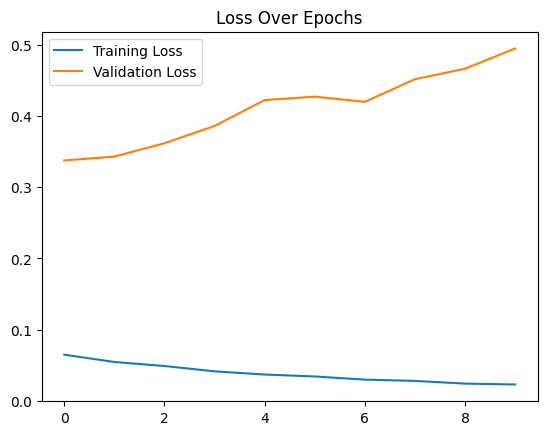

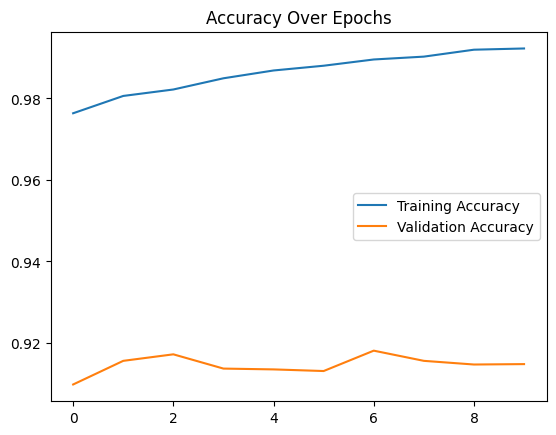

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss for MNIST Fashion dataset
history = model_fashion.fit(X_train_fashion[..., None], y_train_fashion, epochs=10, validation_data=(X_test_fashion[..., None], y_test_fashion))

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()


#4- Plot the loss and accuracy for training and testing datasets.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9949 - loss: 0.0169 - val_accuracy: 0.9155 - val_loss: 0.4939
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9947 - loss: 0.0154 - val_accuracy: 0.9151 - val_loss: 0.5245
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9941 - loss: 0.0172 - val_accuracy: 0.9128 - val_loss: 0.5370
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9961 - loss: 0.0124 - val_accuracy: 0.9073 - val_loss: 0.5711
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9940 - loss: 0.0180 - val_accuracy: 0.9152 - val_loss: 0.5690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9962 - loss: 0.0117 - val_accuracy: 0.9071 - val_loss: 0.6206
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9953 - loss: 0.0136 - val_accuracy: 0.9159 - val_loss: 0.5912
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9950 -

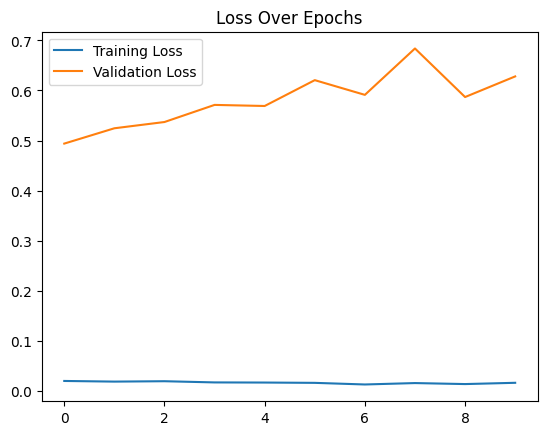

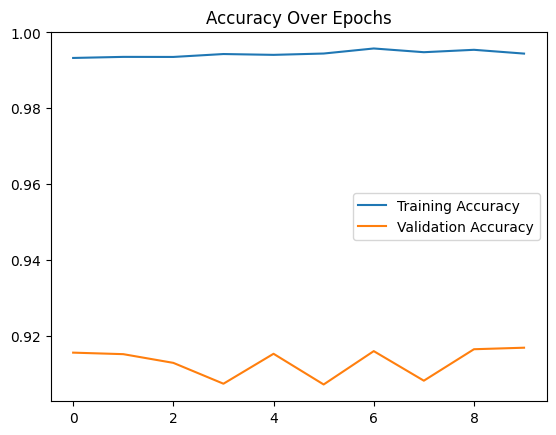

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss for MNIST Fashion dataset
history = model_fashion.fit(X_train_fashion[..., None], y_train_fashion, epochs=10, validation_data=(X_test_fashion[..., None], y_test_fashion))

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()


# 5- Save the weights of the layers and use callbacks during the training process.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Save weights during training
# Change the file extension to '.keras'
checkpoint = ModelCheckpoint('model_weights.keras', save_best_only=True, monitor='val_loss', mode='min')
model_fashion.fit(X_train_fashion[..., None], y_train_fashion, epochs=10, validation_data=(X_test_fashion[..., None], y_test_fashion), callbacks=[checkpoint])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9966 - loss: 0.0105 - val_accuracy: 0.9135 - val_loss: 0.6248
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.9967 - loss: 0.0097 - val_accuracy: 0.9106 - val_loss: 0.6921
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9961 - loss: 0.0120 - val_accuracy: 0.9124 - val_loss: 0.7136
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9951 - loss: 0.0163 - val_accuracy: 0.9146 - val_loss: 0.6692
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9962 - loss: 0.0114 - val_accuracy: 0.9136 - val_loss: 0.6643
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9174 - val_loss: 0.6780
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9982 - loss: 0.0058 - val_accuracy: 0.9091 - val_loss: 0.7460
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.9960 -


# 6- Practice saving and loading the trained model.

In [ ]:
from tensorflow.keras.models import load_model

# Save the model
model_fashion.save('fashion_mnist_model.h5')

# Load the model
loaded_model = load_model('fashion_mnist_model.h5')

# Evaluate the loaded model
loss, accuracy = loaded_model.evaluate(X_test_fashion[..., None], y_test_fashion)
print("Loaded Model Accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9108 - loss: 0.7770
Loaded Model Accuracy: 0.9136999845504761
